# Installing the libraries

1. If you can read this text is because you have installed anaconda successfully
2. Open the Anaconda Prompt
3. Type: pip install sounddevice
    * conda install -c conda-forge python-sounddevice
4. Type: pip install simpleaudio (in case it doesn't work)
    * conda install -c skmad simpleaudio
    * sudo apt-get install -y python3-dev libasound2-dev

In [26]:
import sounddevice as sd
from scipy.io.wavfile import write
import numpy as np
import simpleaudio as sa
import matplotlib.pyplot as plt

In [27]:
%matplotlib inline

## Band Width 

Frequency range where most of the energy of a signal is contained.

(Rang de freqüències on està compresa la major part de l’energia d’un senyal)

## Generation of a pure pulse thru a sinus wave
Be sure that the audio is working propertly in your computer.

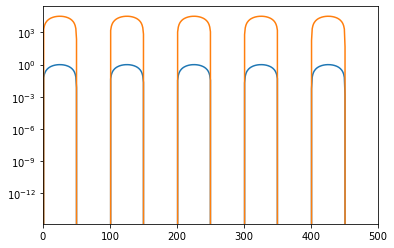

In [28]:
frequency = 440  # Our played note will be 440 Hz
fs = 44100       # 44100 samples per second
seconds = 3      # Note duration of 3 seconds:

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs, False)

# Generate a 440 Hz sine wave
note = np.sin(frequency * t * 2 * np.pi)
plt.semilogy(note)
plt.xlim([0,500])

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
plt.semilogy(audio)
plt.xlim([0,500])
# Convert to 16-bit data
audio = audio.astype(np.int16)

# Start playback
play_obj = sa.play_buffer(audio, 1, 2, fs)

# Wait for playback to finish before exiting
play_obj.wait_done()

## the spectrum in the time domain...

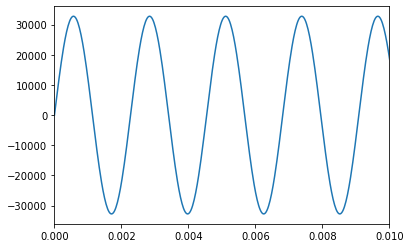

In [29]:
plt.xlim(0,0.01)
plt.plot(t, audio)
plt.show()

## and the spectrum in the frequency domain

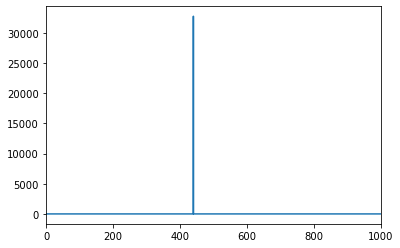

In [30]:
from scipy.fftpack import fft
sampling_period = t[1]-t[0]
number_of_points = len(audio)
yf = fft(audio)
xf = np.linspace(0.0, 1.0/(2.0*sampling_period), number_of_points//2)
plt.plot(xf, 2.0/number_of_points * np.abs(yf[0:number_of_points//2]))
plt.xlim(0,1000)
plt.show()

# Bandwidth in the "music" domain
Let's consider the different frequencies associated to the musical scale. Then we can see what is the bandwidth for the central scale. It is easy to calculate in this case the bandwidth and understand what does it mean.

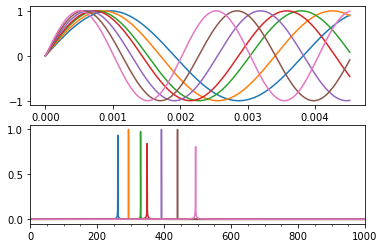

In [31]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

DO = 261.6 #Hz
RE = 293.665
MI = 329.628
FA = 349.228
SOL = 391.995
LA = 440
SI = 493.883
_do = 523.25
fig, axs = plt.subplots(2)
scale = [DO,RE,MI,FA,SOL,LA, SI]
fs = 44100
seconds = 3
t = np.linspace(0, seconds, seconds * fs, False)
notes = [np.sin(2*np.pi*note*t) for note in scale]
for note in notes:
    audio = note * (2**15 - 1) / np.max(np.abs(note))
    audio = audio.astype(np.int16)
    play_obj = sa.play_buffer(audio, 1, 2, fs)
    play_obj.wait_done()
for note in notes:
    axs[0].plot(t[0:200], note[0:200])
plt.xlim(0,0.25)
sampling_period = t[1] - t[0]
number_of_points = len(t)
yf = []
for index, note in enumerate(notes):
    yf.append(list(fft(note)))

xf = np.linspace(0.0, 1.0/(2.0*sampling_period), number_of_points//2)
plt.xlim(0,1000)
for y in yf:
    axs[1].plot(xf, 2.0/number_of_points * np.abs(y[0:number_of_points//2]))
axs[1].xaxis.set_major_locator(MultipleLocator(200))
axs[1].xaxis.set_major_formatter('{x:.0f}')
axs[1].xaxis.set_minor_locator(MultipleLocator(50))


## Now is time to test some real sounds...
The code bellow store any sound for 3 seconds. Once the code is executed it will capture any sound.

Say something

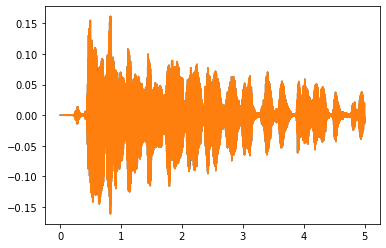

[[ 0.0000000e+00  0.0000000e+00]
 [-3.0517578e-05  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]
 ...
 [-1.2023926e-02 -1.2023926e-02]
 [-1.1505127e-02 -1.1505127e-02]
 [-1.0955811e-02 -1.0986328e-02]]


In [32]:
fs = 44100  # Sample rate
seconds = 5  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('output3.wav', fs, myrecording)  # Save as WAV file 
time = np.arange(0,5,1/44100)
plt.plot(time, myrecording)
plt.show()
print(myrecording)

This code line:  
`sd.play(myrecoding, 44100)`  
repeat the stored sounds captured above

In [34]:
sd.play(myrecording, 44100)

## Again we show the sound spectrum in the time domain...

audio: 220500
temps:  165375


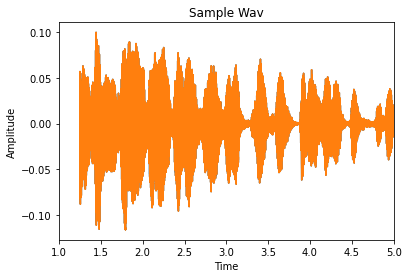

In [35]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read("output3.wav")
audio = input_data[1]
print("audio:", len(audio))
time = np.arange(1.25,5,1/44100)#afegim l'offset vist experimentalment 1.25seg
print("temps: ",len(time))
offset = len(audio)-len(time)
# plot the first 1024 samples
#plt.ylim(-5,5)
#plt.xlim(0.5,0.55)
f_audio = audio[offset:]
plt.plot(time,f_audio)
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
plt.xlim(1, 5)
# display the plot
plt.show()

<span style="color:blue">Blue line </span> corresponds to left channel  
<span style= "color:orange"> Yellow line </span> corresponds to right channel

## And in the frequency domain  
We pass the spectrum represented in the time domain  
to the frequency domain. Just remember that any periodic  
signal can be descomposed in a different group of single frequency signals :  
$ y(t) = A·sin(\frac{2·\pi}{T}·t + \phi)$   
$ T = \frac {1}{f} $  
$ Y(F) = \int_{-\infty}^{\infty} y(t)·e^{-i2\pi ·f·t}  \,dt $


44100 2.2675736961451248e-05
valor final de frequencia:  22050.0


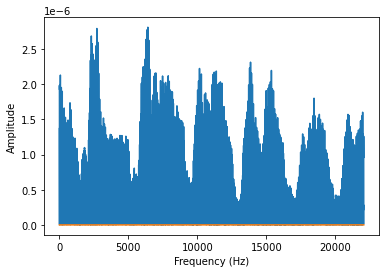

In [36]:
from scipy.fftpack import fft

def calcula_fft(audio, fs):
    period = 1/fs
    print(fs, period)
    number_of_points = len(audio)
    #yf = fft(audio)
    yf = fft(audio)
    yf = yf[0:int(number_of_points//2)] #per eliminar la part negativa de la FFT
    signal_fft = 2.0/number_of_points * yf
    f_final = 1.0/(2.0*period)
    print('valor final de frequencia: ',f_final)
    xf = np.linspace(0.0, 1.0/(2.0*sampling_period), number_of_points//2) #per tenir el mateix num. de punts
    #xf = xf[0:len(xf)//2]

    return signal_fft, xf

sampling_period = time[1]-time[0]
signal_fft, xf = calcula_fft(f_audio, fs)

fig, (a1) = plt.subplots(1)
a1.plot(xf, np.abs(signal_fft ))

plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.show()

**BandWidth**: Frequency rank where most of the energy of a signal is included
# Filtering the signal

3.7499773242630385
82687 14999


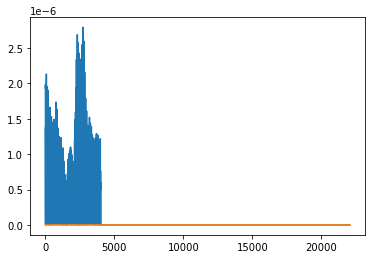

In [37]:
points_per_freq = len(xf)/(fs/2)
print(points_per_freq)

#Our target frequency is 
target_idx = int(points_per_freq * 4000)
yfinal = np.copy(signal_fft)
print(len(signal_fft), target_idx)
# we filter the signal (low-pass)
# cut-off frequency = 15kHz
yfinal[target_idx -1 :] = 0

plt.plot(xf,np.abs(yfinal))

82687


C:\Users\JUNJIE_LI\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\JUNJIE_LI\AppData\Local\Temp\ipykernel_8008\4011033248.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  norm_new_signal = np.int16(new_sig*32767/new_sig.max())


TypeError: Unsupported data type: 'str608'

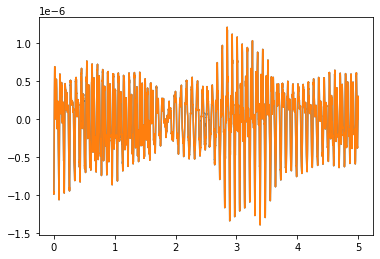

In [39]:
from scipy.fftpack import ifft

new_sig = ifft(yfinal)
print(len(new_sig))
xt = np.linspace(0,5,target_idx)
plt.plot(xt,new_sig[0:target_idx])

norm_new_signal = np.int16(new_sig*32767/new_sig.max())
write("filtered_signal.wav",fs, norm_new_signal)

sd.play(myrecording, 44100)

# Adding freq carrier

Could we modulate that signal to somewhere else? The simplest way to  
modulate a data signal is multiplying by a sinus function with freq  
equal to the carrier frequency we want. 
The multiplication in the time domain transforms to a convolution product  
in the frequency domain.
The reason is to minimize the effect of tha attenuation produced by the transmission medium

<img src="Imatge1.png" alt="drawing" width="400"/>

In telecommunications and signal processing, baseband is the range of frequencies occupied by a signal that has not been modulated to higher frequencies. Baseband signals typically originate from transducers, converting some other variable into an electrical signal. For example, the output of a microphone is a baseband signal that is an analog of the applied voice audio. In conventional analog radio broadcasting the baseband audio signal is used to modulate an RF carrier signal at a much higher frequency.

Moving the original signal from **baseband** to higher frequencies where the attenuation is lower is named **MODULATION**. There are three basic types of modulation:
* Modulation in Amplitude
* Modulation in Frequency
* Modulation in Phase
<img src="Imatge2.png" alt="drawing" width="300"/>

## Armonic Generation
A basic shift to higher frequencies can be observed considering the first example: The one_lined musical scale, which was generated, represented and sounded. Now, in the following example, we present the next scale, obtained just multiplying by 2 the previous one.  

[261.6, 293.665, 329.628, 349.228, 391.995, 440, 493.883, 523.2, 587.33, 659.256, 698.456, 783.99, 880, 987.766]


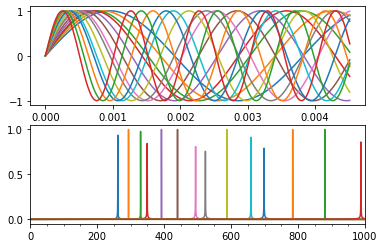

In [13]:
DO = 261.6 #Hz
RE = 293.665
MI = 329.628
FA = 349.228
SOL = 391.995
LA = 440
SI = 493.883

fig, axs = plt.subplots(2)
scale = [DO,RE,MI,FA,SOL,LA, SI]
tmp = [element*2 for element in scale]
scale+=tmp
print(scale)

fs = 44100
seconds = 3
t = np.linspace(0, seconds, seconds * fs, False)
notes = [np.sin(2*np.pi*note*t) for note in scale]
for note in notes:
    audio = note * (2**15 - 1) / np.max(np.abs(note))
    audio = audio.astype(np.int16)
    play_obj = sa.play_buffer(audio, 1, 2, fs)
    play_obj.wait_done()
for note in notes:
    axs[0].plot(t[0:200], note[0:200])
plt.xlim(0,0.25)
sampling_period = t[1] - t[0]
number_of_points = len(t)
yf = []
for index, note in enumerate(notes):
    yf.append(list(fft(note)))

xf = np.linspace(0.0, 1.0/(2.0*sampling_period), number_of_points//2)
plt.xlim(0,1000)
for y in yf:
    axs[1].plot(xf, 2.0/number_of_points * np.abs(y[0:number_of_points//2]))
axs[1].xaxis.set_major_locator(MultipleLocator(200))
axs[1].xaxis.set_major_formatter('{x:.0f}')
axs[1].xaxis.set_minor_locator(MultipleLocator(50))

Here, if we consider that our transmission medium has a minimum attenuation between 500 and 1000Hz, we could shift (as we have done) the tones and later, in reception recover the original scale... In our example, we extend the tone list to their first armonic, from this armonic it is easy to recover the original one just dividing by 2 at reception.

introduce the carrier frequency 10000
165375 0.0 2.9999773242630385
165375


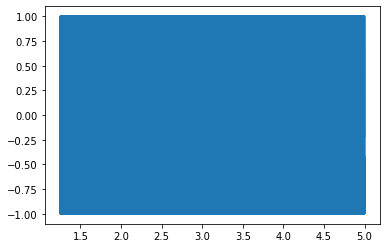

82687


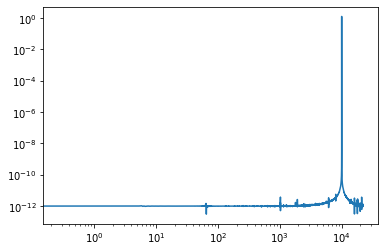

In [14]:
fc = float(input('introduce the carrier frequency '))
print(len(time), t[0], t[-1])
carrier_signal = np.sin(2*np.pi*fc*time)
print(len(carrier_signal))

plt.plot(time, carrier_signal)
plt.show()
t_sampling = time[1]-time[0]
f_sampling = 1/t_sampling
cf = np.abs(np.fft.fft(carrier_signal))

cf = cf[1:len(cf)//2 +1]

carrier_fft = 2.0/number_of_points * cf
print(len(carrier_fft))
xf_f = np.linspace(0.0, 1.0*f_sampling/(2.0), len(carrier_fft//2))

plt.loglog(xf_f, carrier_fft)
plt.show()

14999


C:\Users\JUNJIE_LI\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


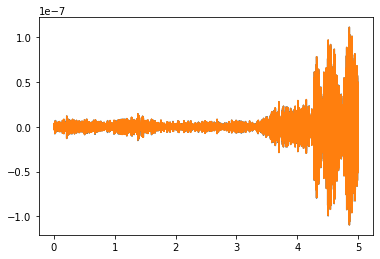

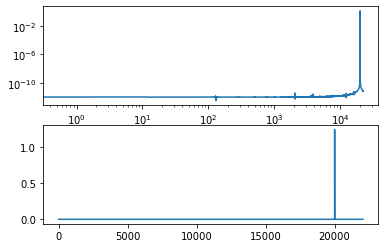

In [15]:
print(len(new_sig[0:target_idx]))
modulated_signal = [x*y for x, y in zip(new_sig[0:target_idx],carrier_signal[0:target_idx])]
plt.plot(xt, modulated_signal)
plt.show()

modulated_signal_f = np.abs(fft(carrier_signal))
modulated_signal_f = modulated_signal_f[1:len(cf)//2 +1]

modulated_fft = 2.0/number_of_points * modulated_signal_f
xf_f = np.linspace(0.0, 1.0*f_sampling/(2.0), len(modulated_fft//2))
fig, axs = plt.subplots(2)
axs[0].loglog(xf_f, modulated_fft)
axs[1].plot(xf_f, modulated_fft)

modify the number of points to modulate the data array to higher frequencies

## But what happens with binary data?

In [16]:
bit_stream = np.random.randint(2, size = 50)
print(bit_stream)

[1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 0 1 1 1]


[1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 0 1 1 1]


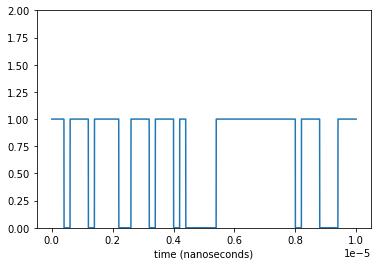

10000
[1 1 1 ... 1 1 1]


In [17]:
bit_time = 200 #nanoseconds
signal_stream = []
signal_time = []
contador = 0
print(bit_stream)
for i in bit_stream:
    for level in range(0,bit_time):
        signal_stream.append(i)
        signal_time.append(contador)
        contador += 1
plt.ylim(0,2)
signal_time = np.array(signal_time)
signal_stream = np.array(signal_stream)
signal_time = signal_time*1E-9
plt.plot(signal_time, signal_stream)
plt.xlabel("time (nanoseconds)")
plt.show()
print(len(signal_time))
print(signal_stream)

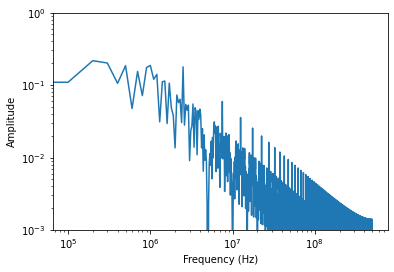

1e-09


In [18]:
from scipy.fftpack import fft
t_sampling = signal_time[1]-signal_time[0]
fs = 1/t_sampling
#period = 1/fs
number_of_points = len(signal_stream)
yf = fft(signal_stream)
xf = np.linspace(0.0, 1.0/(2.0*t_sampling), number_of_points//2)
plt.loglog(xf, 2.0/number_of_points * np.abs(yf[0:number_of_points//2]))
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.ylim(1E-3, 1)
plt.show()
print(t_sampling)

# now is time to modulate the signal

49999999.0


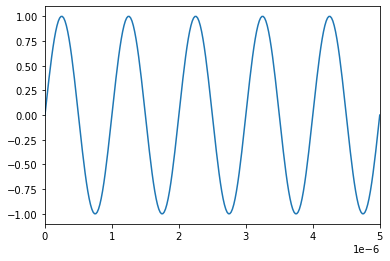

In [19]:
time_carrier = np.linspace(0, 1, 50000000)
t_sampling = (time_carrier[1]-time_carrier[0])
f_sampling = 1/t_sampling
print(f_sampling)
carrier_freq = 1E6
carrier = np.sin(2*np.pi*carrier_freq*time_carrier)
plt.plot(time_carrier, carrier)
plt.xlim([0,5/carrier_freq])
plt.show()

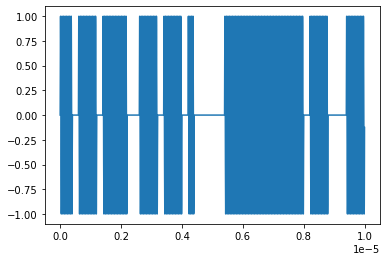

In [20]:
modulated_signal = carrier[0:len(signal_stream)]*signal_stream
plt.plot(signal_time, modulated_signal)
plt.show()

###  Fem un ZOOM!!!

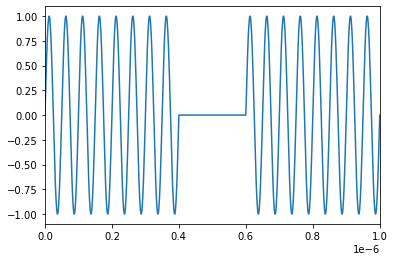

In [21]:
plt.plot(signal_time, modulated_signal)
plt.xlim(0, 0.1E-5)
plt.show()

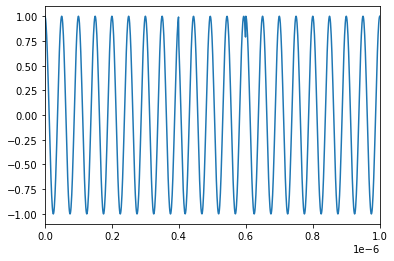

In [22]:
carrier1 = np.sin(2*np.pi*carrier_freq*time_carrier+np.pi/2)
carrier2 = np.sin(2*np.pi*carrier_freq*time_carrier+ np.pi*3/4)

modulated_signal1 = carrier1[0:len(signal_stream)]*signal_stream

signal_stream2 = []
for element in signal_stream:
    if element >= 0.5:
        signal_stream2.append(0)
    else:
        signal_stream2.append(1)

mod = np.array(signal_stream2)
modulated_signal2 = mod*carrier2[0:len(signal_stream)]
phase_modulation = modulated_signal1 + modulated_signal2
plt.plot(signal_time, phase_modulation)

plt.xlim(0, 0.1E-5)
plt.show()

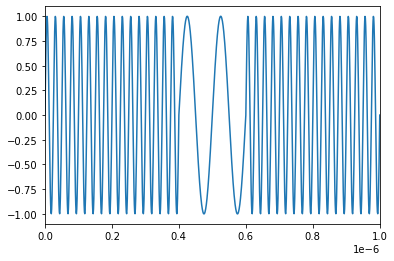

In [23]:
fcarrier1 = np.sin(2*np.pi*carrier_freq*time_carrier*2)
fcarrier2 = np.sin(2*np.pi*carrier_freq*time_carrier*0.5)
fmod1 = signal_stream*fcarrier1[0:len(signal_stream)]
fmod2 = mod*fcarrier2[0:len(signal_stream)]
freq_mod = fmod1+fmod2
plt.plot(signal_time, freq_mod)

plt.xlim(0, 0.1E-5)
plt.show()

sampling time:  2.0000000400000007e-08
sampling frequency 49999999.0
Carrier frequency:  1000000.0


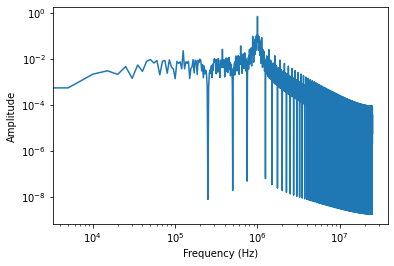

In [24]:
from scipy.fftpack import fft
t_sampling = time_carrier[1]-time_carrier[0]
print("sampling time: ",t_sampling)
fs = 1/t_sampling
print("sampling frequency", fs)
print("Carrier frequency: ", carrier_freq)
#period = 1/fs
number_of_points = len(modulated_signal)
yf = fft(modulated_signal)
xf = np.linspace(0.0, 1.0/(2.0*t_sampling), number_of_points//2)
plt.loglog(xf, 2.0/number_of_points * np.abs(yf[0:number_of_points//2]))
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.show()